# High order epistasis in hormone sensitivity (1)

Initial imports. Download the `epistasis` package [here](https://www.github.com/harmslab/epistasis)

In [1]:
# Import necessary science modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Reset some default parameters in matplotlib
import matplotlib as mpl
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["font.size"] = 10

# Linear epistasis model
from epistasis.models.linear import LinearEpistasisModel

# Nonlinear epitasis model
from epistasis.models.nonlinear import NonlinearEpistasisModel

## Linear epistasis model

The expectation baked into a linear epistasis model is that mutations have individual effects that sum together to give the phenotype. Epistasis, then, describes deviation from this additivity when multiple mutations are measured together. 

(<matplotlib.figure.Figure at 0x109dcb2e8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10ae241d0>])

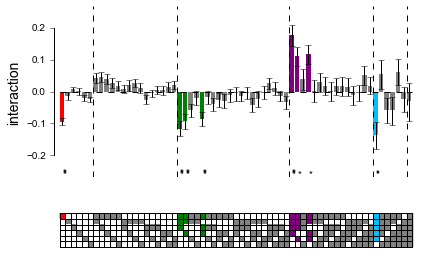

In [3]:
# Location of the data
in_path = "../../datasets/hall_haploid_growth.json"

# Fit epistasis with linear model. 
linear = LinearEpistasisModel.from_json(in_path)
linear.fit()
linear.fit_error()

linear.Plot.interactions(sigmas=1, log_space=True, height_ratio=2)

## Nonlinear epistasis model - saturation curve

We'll "expect" that as more mutations are introduced, their effect diminishes. Thus, the effect of a mutation depends on when it is introduced in the evolutionary trajectory. To capture this saturation, we fit with the following model:

$$
F(f(\vec{x})) = \frac{A \cdot f(\vec{x})}{B + f(\vec{x})}
$$

where $f(\vec{x})$ is the phenotype assuming linear epistasis. 

Fit with a nonlinear least squares regression. 

In [46]:
def saturation(x, saturation, rate):
    """ Saturation function where X is the linear epistasis model. """
    y = (saturation  * x / ( x + rate ))
    return y

R-squared of fit: 0.907923116964
rate: 0.327771754253
saturation: 2.42995339267e-05


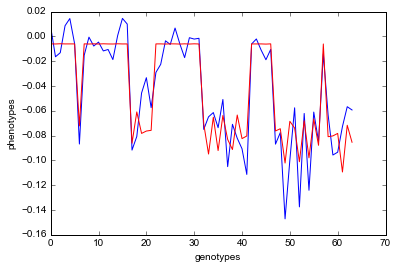

In [48]:
# Initialize a nonlinear LS regression, passing the function above.
nonlinear = NonlinearEpistasisModel.from_json(in_path, order=1, function=saturation)
nonlinear.fit_widget(saturation=(-1, 5, .1), rate=(-1,5, .1))

(<matplotlib.figure.Figure at 0x10bb838d0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10ba75940>])

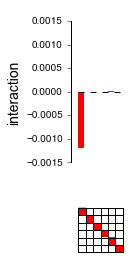

In [49]:
nonlinear.Plot.interactions(sigmas=0, figsize=(2,4), height_ratio=2, log_space=True)

(<matplotlib.figure.Figure at 0x10b99ba20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10bcaf7b8>)

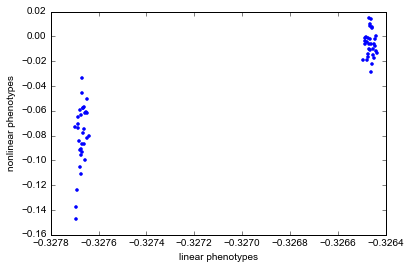

In [50]:
nonlinear.Plot.linear_phenotypes()

## Nonlinear epistasis model - Hill Model

In [44]:
def hill_equation(x, rate, hill):
    """ Saturation function where X is the linear epistasis model. """
    y = ( 1.0 / ((rate/x)**hill + 1))
    print(y)
    return y

[  3.11615095e-08  -6.79883766e-06   9.15874031e-07  -1.43055850e-07
  -2.98387145e-09   1.17838624e-09  -3.04256586e-03  -1.89729686e-06
  -2.03939813e-05   2.37660508e-09  -1.30290222e-05   1.34598937e-07
  -9.45951719e-07  -9.30724209e-06   4.42579998e-07  -3.92317988e-07
  -4.39962210e-08  -4.66645527e-03  -2.64608044e-03  -3.60394023e-03
  -3.34202512e-03  -3.17672606e-03  -8.94273798e-06  -4.88379999e-06
  -3.24858933e-05  -3.43910883e-08  -3.02995551e-06  -2.54430732e-05
  -4.32227950e-10  -1.68194433e-05   2.79355150e-08  -1.68816971e-06
  -4.13485942e-03  -5.40918539e-03  -3.15864462e-03  -5.06396167e-03
  -2.91917899e-03  -3.93887257e-03  -4.84493306e-03  -2.76833399e-03
  -3.75412924e-03  -3.48484491e-03  -1.62773596e-05  -1.19261850e-05
  -6.92076049e-06  -3.92991115e-05  -1.52493515e-07  -4.82091679e-03
  -4.50171175e-03  -5.84770315e-03  -3.46560346e-03  -4.29947696e-03
  -5.60621167e-03  -3.29619301e-03  -5.25247472e-03  -3.04969122e-03
  -4.09823768e-03  -2.06471139e-05

/Users/Zsailer/virtual/py3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()


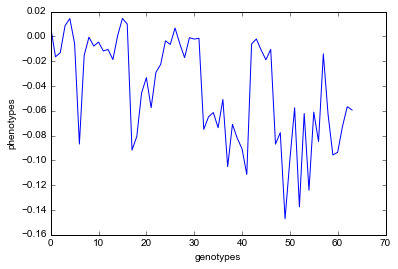

In [45]:
# Initialize a nonlinear LS regression, passing the function above.
nonlinear = NonlinearEpistasisModel.from_json(in_path, order=1, function=hill_equation)
nonlinear.fit_widget(rate=(-1, 1, .1), hill=(0, 4, .1))

(<matplotlib.figure.Figure at 0x10a471400>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10a705550>)

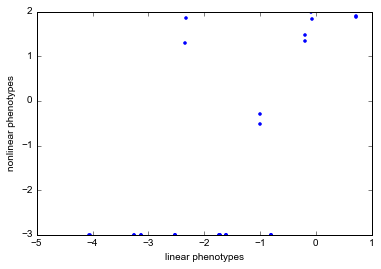

In [9]:
nonlinear.Plot.linear_phenotypes()

(<matplotlib.figure.Figure at 0x10b8083c8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10b855ba8>])

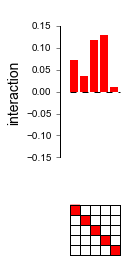

In [10]:
nonlinear.Plot.interactions(sigmas=0, figsize=(2,4), height_ratio=2, log_space=True)